Partie 1 : Prétraitement des données

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import to_categorical
import pandas as pd # Import pandas

# Chargement des données
from google.colab import files
uploaded = files.upload()

# Load the dataframe
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

Saving IMDB Dataset.csv to IMDB Dataset (1).csv


In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Chargement des données
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Fonction pour vectoriser les séquences
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# Vectorisation des données
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Conversion des labels en numpy arrays
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Création d'un ensemble de validation (10000 échantillons)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Partie 2 : Construction du modèle

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

# Construction du modèle
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Partie 3 : Entraînement du modèle

In [ ]:
# Entraînement du modèle
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.6844 - loss: 0.6034 - val_accuracy: 0.8620 - val_loss: 0.3984
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8891 - loss: 0.3431 - val_accuracy: 0.8779 - val_loss: 0.3215
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9171 - loss: 0.2526 - val_accuracy: 0.8852 - val_loss: 0.2901
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9367 - loss: 0.1990 - val_accuracy: 0.8891 - val_loss: 0.2758
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9488 - loss: 0.1616 - val_accuracy: 0.8878 - val_loss: 0.2783
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9578 - loss: 0.1310 - val_accuracy: 0.8861 - val_loss: 0.2884
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9654 - loss: 0.1167 - val_accuracy: 0.8861 - val_loss: 0.2967
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9729 - loss: 0.0966 - val_accuracy: 0.8832 - v

Partie 4 : Évaluation du modèle

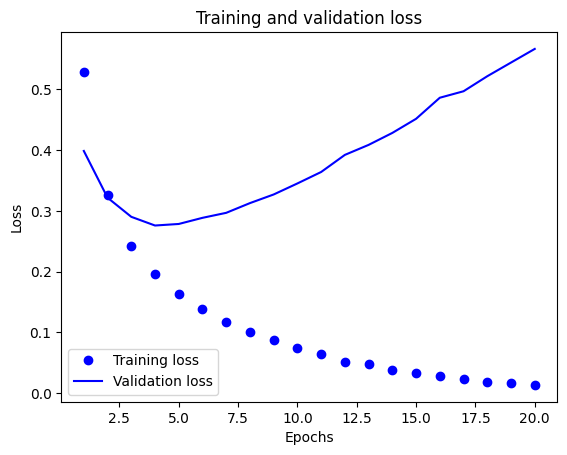

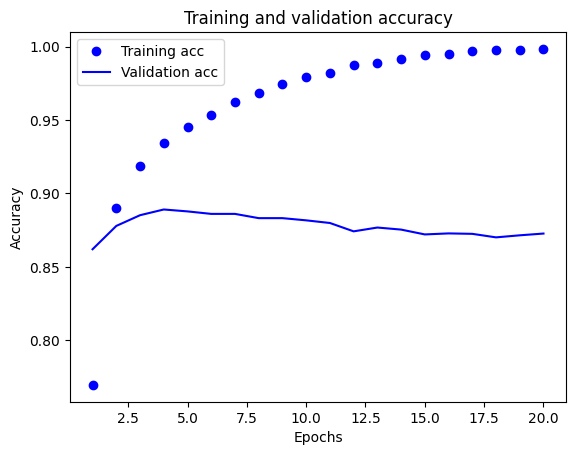

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7428 - loss: 0.5522
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9037 - loss: 0.2806
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9267 - loss: 0.2124
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9427 - loss: 0.1712
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8839 - loss: 0.2894
Test loss: 0.28653770685195923, Test accuracy: 0.8858399987220764


In [ ]:
# Tracé des courbes de loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tracé des courbes d'accuracy
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Réentraînement avec 4 epochs (par exemple) pour éviter l'overfitting
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

# Évaluation sur le test set
results = model.evaluate(x_test, y_test)
print(f"Test loss: {results[0]}, Test accuracy: {results[1]}")

Partie 5 : Analyse des résultats


In [ ]:
# Analyse des résultats
print("\nAnalyse des résultats:")
print(f"Accuracy finale sur le test set: {results[1]*100:.2f}%")
print(f"Loss finale sur le test set: {results[0]:.4f}")

# Comparaison training/validation
final_train_loss = history_dict['loss'][-1]
final_val_loss = history_dict['val_loss'][-1]
print(f"\nComparaison training/validation (après 20 epochs):")
print(f"Training loss: {final_train_loss:.4f} vs Validation loss: {final_val_loss:.4f}")
print("Si la validation loss est significativement plus élevée que le training loss, c'est un signe d'overfitting.")


Analyse des résultats:
Accuracy finale sur le test set: 88.58%
Loss finale sur le test set: 0.2865

Comparaison training/validation (après 20 epochs):
Training loss: 0.0137 vs Validation loss: 0.5662
Si la validation loss est significativement plus élevée que le training loss, c'est un signe d'overfitting.
